In [5]:
import pandas as pd
import ccxt
from statsmodels.regression.rolling import RollingOLS
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import coint

plt.style.use("seaborn-v0_8")

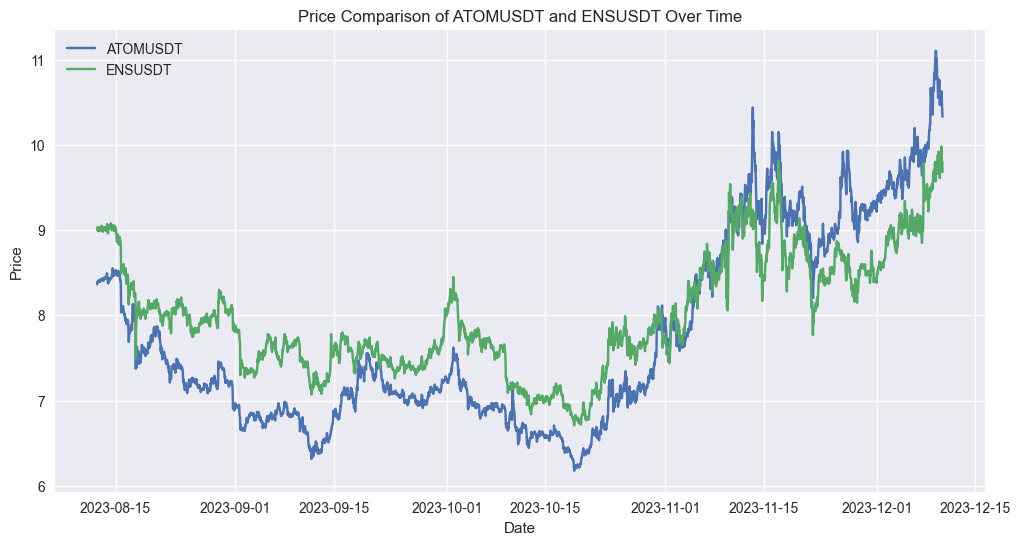

In [6]:
# cointegrated_pairs = [('ETHUSDT', 'BNBUSDT'), ('ETHUSDT', 'ADAUSDT'), ('ETHUSDT', 'ETCUSDT'), ('ETHUSDT', 'FILUSDT'), ('ETHUSDT', 'EGLDUSDT'), ('ETHUSDT', 'DOGEUSDT'), ('ETHUSDT', 'FTMUSDT'), ('ETHUSDT', 'MANAUSDT'), ('ETHUSDT', 'MATICUSDT'), ('ETHUSDT', 'AXSUSDT'), ('ETHUSDT', 'XTZUSDT'), ('ETHUSDT', 'ICXUSDT'), ('ETHUSDT', 'ALGOUSDT'), ('ETHUSDT', 'ZILUSDT'), ('ETHUSDT', 'GMTUSDT'), ('ETHUSDT', 'CHZUSDT'), ('ETHUSDT', 'APTUSDT'), ('LINKUSDT', 'AAVEUSDT'), ('BNBUSDT', 'EOSUSDT'), ('BNBUSDT', 'XRPUSDT'), ('BNBUSDT', 'ETCUSDT'), ('BNBUSDT', 'DOGEUSDT'), ('BNBUSDT', 'SANDUSDT'), ('BNBUSDT', 'ATOMUSDT'), ('BNBUSDT', 'AXSUSDT'), ('BNBUSDT', 'XTZUSDT'), ('BNBUSDT', 'ICXUSDT'), ('BNBUSDT', 'ZILUSDT'), ('BNBUSDT', 'GMTUSDT'), ('BNBUSDT', 'CHZUSDT'), ('BNBUSDT', 'APTUSDT'), ('DOTUSDT', 'ETCUSDT'), ('DOTUSDT', 'DOGEUSDT'), ('DOTUSDT', 'GALAUSDT'), ('DOTUSDT', 'ATOMUSDT'), ('DOTUSDT', 'AXSUSDT'), ('DOTUSDT', 'OPUSDT'), ('ADAUSDT', 'EGLDUSDT'), ('ADAUSDT', 'THETAUSDT'), ('ADAUSDT', 'MATICUSDT'), ('ADAUSDT', 'ICXUSDT'), ('EOSUSDT', 'XRPUSDT'), ('EOSUSDT', 'DOGEUSDT'), ('EOSUSDT', 'SANDUSDT'), ('EOSUSDT', 'AXSUSDT'), ('EOSUSDT', 'ENSUSDT'), ('BCHUSDT', 'KNCUSDT'), ('XRPUSDT', 'DOGEUSDT'), ('XRPUSDT', 'XTZUSDT'), ('XRPUSDT', 'KNCUSDT'), ('XRPUSDT', 'CHZUSDT'), ('ETCUSDT', 'FILUSDT'), ('ETCUSDT', 'EGLDUSDT'), ('ETCUSDT', 'DOGEUSDT'), ('ETCUSDT', 'THETAUSDT'), ('ETCUSDT', 'FTMUSDT'), ('ETCUSDT', 'SANDUSDT'), ('ETCUSDT', 'MANAUSDT'), ('ETCUSDT', 'MATICUSDT'), ('ETCUSDT', 'NEARUSDT'), ('ETCUSDT', 'ATOMUSDT'), ('ETCUSDT', 'AXSUSDT'), ('ETCUSDT', 'XTZUSDT'), ('ETCUSDT', 'ICXUSDT'), ('ETCUSDT', 'ALGOUSDT'), ('ETCUSDT', 'ZILUSDT'), ('ETCUSDT', 'GMTUSDT'), ('ETCUSDT', 'CHZUSDT'), ('ETCUSDT', 'APTUSDT'), ('FILUSDT', 'EGLDUSDT'), ('FILUSDT', 'DOGEUSDT'), ('FILUSDT', 'THETAUSDT'), ('FILUSDT', 'MANAUSDT'), ('FILUSDT', 'MATICUSDT'), ('FILUSDT', 'AXSUSDT'), ('FILUSDT', 'XTZUSDT'), ('FILUSDT', 'ICXUSDT'), ('FILUSDT', 'ZILUSDT'), ('FILUSDT', 'GMTUSDT'), ('EGLDUSDT', 'THETAUSDT'), ('EGLDUSDT', 'FTMUSDT'), ('EGLDUSDT', 'MANAUSDT'), ('EGLDUSDT', 'MATICUSDT'), ('EGLDUSDT', 'NEARUSDT'), ('EGLDUSDT', 'ROSEUSDT'), ('EGLDUSDT', 'ICXUSDT'), ('EGLDUSDT', 'ALGOUSDT'), ('DOGEUSDT', 'SANDUSDT'), ('DOGEUSDT', 'MANAUSDT'), ('DOGEUSDT', 'GALAUSDT'), ('DOGEUSDT', 'MATICUSDT'), ('DOGEUSDT', 'ATOMUSDT'), ('DOGEUSDT', 'AXSUSDT'), ('DOGEUSDT', 'XTZUSDT'), ('DOGEUSDT', 'ZILUSDT'), ('DOGEUSDT', 'GMTUSDT'), ('DOGEUSDT', 'OPUSDT'), ('DOGEUSDT', 'ENSUSDT'), ('DOGEUSDT', 'CHZUSDT'), ('DOGEUSDT', 'APTUSDT'), ('THETAUSDT', 'FTMUSDT'), ('THETAUSDT', 'MATICUSDT'), ('THETAUSDT', 'NEARUSDT'), ('THETAUSDT', 'ICXUSDT'), ('THETAUSDT', 'ALGOUSDT'), ('THETAUSDT', 'GMTUSDT'), ('FTMUSDT', 'MATICUSDT'), ('SANDUSDT', 'ATOMUSDT'), ('SANDUSDT', 'AXSUSDT'), ('SANDUSDT', 'XTZUSDT'), ('SANDUSDT', 'OPUSDT'), ('SANDUSDT', 'CHZUSDT'), ('MANAUSDT', 'MATICUSDT'), ('MANAUSDT', 'ICXUSDT'), ('MANAUSDT', 'ZILUSDT'), ('MANAUSDT', 'APTUSDT'), ('AVAXUSDT', 'MATICUSDT'), ('GALAUSDT', 'OPUSDT'), ('GALAUSDT', 'ENSUSDT'), ('MATICUSDT', 'NEARUSDT'), ('MATICUSDT', 'XTZUSDT'), ('MATICUSDT', 'ICXUSDT'), ('MATICUSDT', 'ALGOUSDT'), ('MATICUSDT', 'GMTUSDT'), ('NEARUSDT', 'GMTUSDT'), ('ATOMUSDT', 'AXSUSDT'), ('ATOMUSDT', 'XTZUSDT'), ('ATOMUSDT', 'GMTUSDT'), ('ATOMUSDT', 'CHZUSDT'), ('AAVEUSDT', 'KNCUSDT'), ('AXSUSDT', 'XTZUSDT'), ('AXSUSDT', 'ZILUSDT'), ('AXSUSDT', 'OPUSDT'), ('AXSUSDT', 'CHZUSDT'), ('AXSUSDT', 'APTUSDT'), ('ROSEUSDT', 'ICXUSDT'), ('ROSEUSDT', 'ALGOUSDT'), ('ROSEUSDT', 'VETUSDT'), ('XTZUSDT', 'GMTUSDT'), ('XTZUSDT', 'CHZUSDT'), ('XTZUSDT', 'APTUSDT'), ('ICXUSDT', 'VETUSDT'), ('VETUSDT', 'KNCUSDT'), ('KNCUSDT', 'XMRUSDT'), ('ENSUSDT', 'CHZUSDT'), ('CHZUSDT', 'APTUSDT')]

cointegrated_pairs = [('ATOMUSDT', 'ENSUSDT')]

def fetch_prices(binance, symbol_one, symbol_two, look_back_days): 
    # Prepare empty dataframe for results
    df_final = pd.DataFrame()
    
    # Calculate the end timestamp for the data fetching
    end_timestamp = binance.milliseconds()
    since_timestamp = end_timestamp - look_back_days * 24 * 60 * 60 * 1000 
    
    while since_timestamp < end_timestamp:
        try:
            # Fetch OHLCV data
            ohlcv_theta = binance.fetch_ohlcv(symbol_two, '1h', since=since_timestamp, limit=1000)
            ohlcv_xrp = binance.fetch_ohlcv(symbol_one, '1h', since=since_timestamp, limit=1000)
            
            # Create temporary dataframes to hold fetched data
            df_theta_temp = pd.DataFrame(ohlcv_theta, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
            df_xrp_temp = pd.DataFrame(ohlcv_xrp, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])

            # Check if both dataframes have the same length
            if len(df_theta_temp) != len(df_xrp_temp):
                print(
                    f"Data length mismatch: {symbol_two} has {len(df_theta_temp)} rows, {symbol_one} has {len(df_xrp_temp)} rows.")
                return None
            
            # Merge dataframes
            df_temp = pd.merge(df_xrp_temp[['timestamp', 'close']], df_theta_temp[['timestamp', 'close']], on='timestamp', how='inner')
            df_temp.columns = ['timestamp', symbol_one, symbol_two]
            
            # Concatenate with the final dataframe
            df_final = pd.concat([df_final, df_temp])
            
            # Update the since_timestamp to the last timestamp fetched
            since_timestamp = df_final['timestamp'].max() + (60 * 60 * 1000)  # Add one hour

        except Exception as e:
            print(f"Error in fetching prices: {e}")
            break
    
    # Remove duplicates and sort the dataframe
    df_final.drop_duplicates(subset='timestamp', keep='first', inplace=True)
    df_final.sort_values(by='timestamp', inplace=True)
    
    return df_final

binance = ccxt.binance()

for pair in cointegrated_pairs:
    prices = fetch_prices(binance, pair[0], pair[1], 120)

    # Convert 'timestamp' to datetime
    prices['timestamp'] = pd.to_datetime(prices['timestamp'], unit='ms')

    # Set 'timestamp' as the index
    prices.set_index('timestamp', inplace=True)

    # Ensure there are no duplicates
    prices.drop_duplicates(inplace=True)

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(prices.index, prices[pair[0]], label=pair[0])
    plt.plot(prices.index, prices[pair[1]], label=pair[1])

    # Adding labels and title
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'Price Comparison of {pair[0]} and {pair[1]} Over Time')
    plt.legend()

    # Display the plot
    plt.show()